### Deliverable 3: Optimizing the Model

In [179]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [180]:
application_df.nunique()

EIN                       34299
NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [181]:
# APPLICATION_TYPE
app_type_counts = application_df.APPLICATION_TYPE.value_counts()
replace_application = list(app_type_counts[app_type_counts < 300].index)
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
print(application_df.APPLICATION_TYPE.value_counts())

# CLASSIFICATION
classification_counts = application_df.CLASSIFICATION.value_counts()
replace_class = list(classification_counts[classification_counts < 1000].index)
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
print(application_df.CLASSIFICATION.value_counts())

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64


In [182]:
# Drop the non-beneficial ID columns
application_df.drop(columns=['EIN','NAME','ASK_AMT'],inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,1


In [183]:
# One Hot Encoding
application_cat = application_df.dtypes[application_df.dtypes == 'object'].index.tolist()
enc = OneHotEncoder(sparse=False)
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))
encode_df.columns = enc.get_feature_names(application_cat)
application_df = application_df.merge(encode_df,left_index=True,right_index=True).drop(application_cat,1)
application_df.head()

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [184]:
# Split Train & Test Dataset
X = application_df.drop(columns = 'IS_SUCCESSFUL').values
y = application_df['IS_SUCCESSFUL'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [185]:
# Scale the data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [186]:
# Define the Neural Network model
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 20
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, activation="relu", input_dim=number_input_features))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn.summary()

# Create checkpoints and Compile
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=804
)
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=60,callbacks=[cp_callback])

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_123 (Dense)            (None, 80)                3440      
_________________________________________________________________
dense_124 (Dense)            (None, 30)                2430      
_________________________________________________________________
dense_125 (Dense)            (None, 20)                620       
_________________________________________________________________
dense_126 (Dense)            (None, 1)                 21        
Total params: 6,511
Trainable params: 6,511
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
793/804 [============================>.] - ETA: 0s - loss: 0.5755 - accuracy: 0.7148
Epoch 00001: saving model to checkpoints/weights.01.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5750 - accuracy: 0.7151
Epoch 2

Epoch 31/60
791/804 [============================>.] - ETA: 0s - loss: 0.5402 - accuracy: 0.7372
Epoch 00031: saving model to checkpoints/weights.31.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5402 - accuracy: 0.7372
Epoch 32/60
781/804 [============================>.] - ETA: 0s - loss: 0.5413 - accuracy: 0.7370
Epoch 00032: saving model to checkpoints/weights.32.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5405 - accuracy: 0.7378
Epoch 33/60
784/804 [============================>.] - ETA: 0s - loss: 0.5403 - accuracy: 0.7370
Epoch 00033: saving model to checkpoints/weights.33.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5400 - accuracy: 0.7369
Epoch 34/60
782/804 [============================>.] - ETA: 0s - loss: 0.5400 - accuracy: 0.7358
Epoch 00034: saving model to checkpoints/weights.34.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5396 - accuracy: 0.7362
Epoch 35/60
789/804 [=======

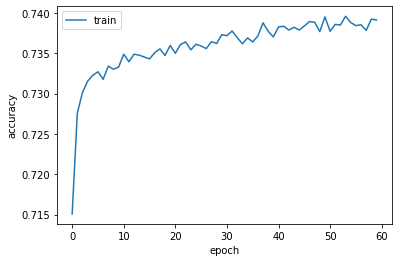

268/268 - 0s - loss: 0.5544 - accuracy: 0.7286
Loss: 0.5543957352638245, Accuracy: 0.7286297082901001


In [187]:
# Plot history of accuracy
plt.plot(fit_model.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [189]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")